<a href="https://colab.research.google.com/github/CHU1226/business-forecast/blob/main/%E5%95%86%E6%83%85%E9%A0%90%E6%B8%AC_%E6%9C%9F%E6%9C%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#人工智慧的商情預測，期末考:

學號：110AB0007

姓名：林千惠

上傳：把開放共用後的網址，上傳到Zuvio

---
#1.練習1：讀入紅酒數據，使用OneHotEncoder來編碼是種類的全部欄位，測試3種機器學習演算法【KNN，決策樹，隨機森林法】，找出【測試數據】所得到準確率最高的一種演算法，並印出其Accuracy
https://acupun.site/lecture/predict/example/resource/wine-chi-1.csv

wine.target，有三種酒類

Barolo酒

Grignolino酒

Barbera酒

---
#請完成以下任務：
#(1).請問3種機器學習演算法【KNN，決策樹，隨機森林法】，用測試數據計算準確率最高的，是哪一種演算法？準確率多少？
#(2).請問最高的這種演算法，使用labelEncoder函數轉換種類欄位所計算得到的準確率多少？使用OneHotEncoder函數轉換種類欄位所計算得到的準確率多少？

In [1]:
import pandas as pd
df = pd.read_csv("https://acupun.site/lecture/predict/example/resource/wine-chi-1.csv")
df

,酒精濃度,蘋果酸,灰,灰的鹼度,鎂,總酚,黃酮類化合物,非黃烷類酚類,原花青素,色彩強度,色調,稀釋酒,脯氨酸,種類
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [13]:
#labelEncoder
import sklearn.model_selection as ms
x_train,x_test,y_train,y_test = ms.train_test_split(
    df[["酒精濃度","蘋果酸","灰","灰的鹼度","鎂","總酚","黃酮類化合物","非黃烷類酚類","原花青素","色彩強度","色調","稀釋酒","脯氨酸"]],
    df["種類"],test_size=0.3)

In [14]:
import sklearn.neighbors as nb
model = nb.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
print("labelEncoderKNN測試數據的準確率",model.score(x_test, y_test))

labelEncoderKNN測試數據的準確率 0.6851851851851852


In [15]:
import sklearn.tree as tree
model2 = tree.DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("labelEncoder決策樹測試數據的準確率",model2.score(x_test, y_test))

labelEncoder決策樹測試數據的準確率 0.9259259259259259


In [16]:
import sklearn.ensemble as es
model3 = es.RandomForestClassifier()
model3.fit(x_train, y_train)
print("labelEncoder隨機森林測試數據的準確率",model3.score(x_test, y_test))

labelEncoder隨機森林測試數據的準確率 0.9814814814814815


In [21]:
#OneHotEncoder
import sklearn.preprocessing as prep
arr1 = prep.OneHotEncoder(sparse_output=False).fit_transform(df[['種類']])
pd.DataFrame(arr1,columns=["種類1","種類2","種類3"])
x_train2,x_test2,y_train2,y_test2 = ms.train_test_split(df[["酒精濃度","蘋果酸","灰","灰的鹼度","鎂","總酚","黃酮類化合物","非黃烷類酚類","原花青素","色彩強度","色調","稀釋酒","脯氨酸"]],
                           arr1,
                           test_size=0.3)

In [22]:
import sklearn.neighbors as nb
model = nb.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train2, y_train2)
print("OneHotEncoderKNN測試數據的準確率",model.score(x_test2, y_test2))

OneHotEncoderKNN測試數據的準確率 0.7037037037037037


In [23]:
import sklearn.tree as tree
model2 = tree.DecisionTreeClassifier()
model2.fit(x_train2, y_train2)
print("OneHotEncoder決策樹測試數據的準確率",model2.score(x_test2, y_test2))

OneHotEncoder決策樹測試數據的準確率 0.9259259259259259


In [24]:
import sklearn.ensemble as es
model3 = es.RandomForestClassifier()
model3.fit(x_train2, y_train2)
print("OneHotEncoder隨機森林測試數據的準確率",model3.score(x_test2, y_test2))

OneHotEncoder隨機森林測試數據的準確率 1.0


---
#(1).請問3種機器學習演算法【KNN，決策樹，隨機森林法】，用測試數據計算準確率最高的，是哪一種演算法？準確率多少？

In [ ]:
'''
答案：
準確率最高的演算法 = 隨機森林
準確率 = 1.0
'''

---
#(2).請問最高的這種演算法，使用labelEncoder函數轉換種類欄位所計算得到的準確率多少？使用OneHotEncoder函數轉換種類欄位所計算得到的準確率多少？
請用測試數據去計算

In [ ]:
'''
答案：
使用labelEncoder函數轉換種類欄位所計算得到的準確率 = 0.9814814814814815
使用OneHotEncoder函數轉換種類欄位所計算得到的準確率 = 1.0
'''

---
#2.練習2：讀入『由症狀判讀用藥資料集』
https://acupun.site/lecture/predict/example/resource/drug200-chi.csv

# ☎本題目標：『LabelEncoder』處理『由症狀判讀用藥資料集』的文字欄位，並用『sklearn的KNN模型』來預測用藥

---
#請完成以下任務：
#(1).必須用LabelEncode()來轉換文字欄位

#(2).請用熱圖表示本資料集的關聯度，依照【用藥】欄位排序(高到低)

#(3).評估AI模型的成效：畫出【混淆矩陣圖】

#(4).計算本AI模型的準確度(測試數據)

#(5).評估本AI模型是否有發生overfitting的現象(有/沒有)？
#(6).請做預測，當A患者的5個特徵值是：【年齡，性別，血壓，膽固醇，血液鈉鉀比例】=【48，F，LOW，HIGH，15.036】，請問A患者該用什麼藥品？

#(7).回答準確率的3個相關問題：

---
#(1).必須用LabelEncode()來轉換文字欄位
DrugY --> 0

drugA --> 1

drugB --> 2

drugC --> 3

drugX --> 4


In [25]:
import pandas as pd
df = pd.read_csv("https://acupun.site/lecture/predict/example/resource/drug200-chi.csv")
df

,年齡,性別,血壓,膽固醇,血液鈉鉀比例,用藥
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [26]:
import sklearn.preprocessing as prep
df["性別2"] = prep.LabelEncoder().fit_transform(df["性別"])
df["血壓2"] = prep.LabelEncoder().fit_transform(df["血壓"])
df["膽固醇2"] = prep.LabelEncoder().fit_transform(df["膽固醇"])
df["用藥2"] = prep.LabelEncoder().fit_transform(df["用藥"])
df2 = df.drop(["性別","血壓","膽固醇","用藥"], axis="columns")
df2

,年齡,血液鈉鉀比例,性別2,血壓2,膽固醇2,用藥2
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,3
2,47,10.114,1,1,0,3
3,28,7.798,0,2,0,4
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,3
196,16,12.006,1,1,0,3
197,52,9.894,1,2,0,4
198,23,14.020,1,2,1,4


---
#(2).請用熱圖表示本資料集的關聯度，依照【用藥】欄位排序(高到低)

In [27]:
df3 = df2.corr()
df4 = df3.sort_values(by="用藥2",ascending=False)
df4

,年齡,血液鈉鉀比例,性別2,血壓2,膽固醇2,用藥2
用藥2,0.041856,-0.689051,0.018239,0.419397,0.048415,1.000000
血壓2,0.054212,-0.149312,-0.007814,1.000000,-0.137552,0.419397
膽固醇2,-0.068234,0.010000,-0.008811,-0.137552,1.000000,0.048415
年齡,1.000000,-0.063119,0.102027,0.054212,-0.068234,0.041856
性別2,0.102027,-0.125008,1.000000,-0.007814,-0.008811,0.018239
血液鈉鉀比例,-0.063119,1.000000,-0.125008,-0.149312,0.010000,-0.689051


In [28]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: line 1: import: command not found
--2024-04-24 15:13:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.102, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-24 15:13:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.7

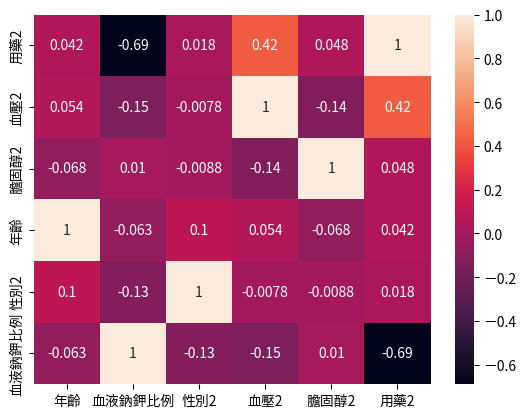

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df4, annot=True)
plt.show()

---
#(3).評估AI模型的成效：畫出【混淆矩陣圖】

In [41]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(
    df2[["年齡","血液鈉鉀比例","性別2","血壓2","膽固醇2"]].values,
    df2["用藥2"],
    test_size=0.3
)

In [42]:
import sklearn.neighbors as nb
model = nb.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

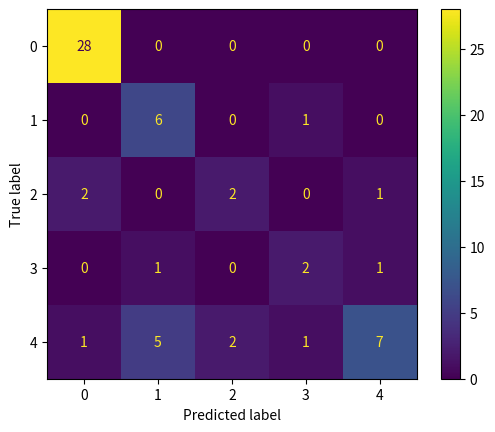

In [43]:
import sklearn.metrics as mts
y_pred = model.predict(x_test)
mts.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

---
#(4).計算本AI模型的準確度(測試數據)

In [44]:
print("AI模型的訓練數據準確度=",model.score(x_train,y_train))

AI模型的訓練數據準確度= 0.7571428571428571


In [45]:
print("AI模型的測試數據準確度=",model.score(x_test,y_test))

AI模型的測試數據準確度= 0.75


---
#(5).評估本AI模型是否有發生overfitting的現象(有/沒有)？

In [ ]:
'''
回答：沒有，因為訓練數據的準確率與測試數據的準確率差異不大

'''

---
#(6).請做預測，當A患者的5個特徵值是：【年齡，性別，血壓，膽固醇，血液鈉鉀比例】=【48，F，LOW，HIGH，15.036】，請問A患者該用什麼藥品？（不要寫數字，請寫藥品名稱：DrugC，DrugX，DrugY.....）

In [46]:
a = model.predict([[48,0,1,0,15.036]])[0]
if a == 0:
  print("DrugY")
elif a == 1:
  print("drugA")
elif a == 2:
  print("drugB")
elif a == 3:
  print("drugC")
elif a == 4:
  print("drugX")

drugX


In [ ]:
'''
回答：
A患者該使用藥品 = drugX
'''

#(7).請問準確率的3個相關問題：

#(7-1).哪一種類的樣本(0,1,2,3,4)，被猜中率最高？

#(7-2).全部樣本的整體被猜中率為多少？

#(7-3).AI模型的預測準確率，最高的，是針對哪一種樣本(0,1,2,3,4)的預測



In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.25      0.50      0.33         4
           2       0.17      0.33      0.22         3
           3       0.33      0.20      0.25         5
           4       0.73      0.47      0.57        17

    accuracy                           0.70        60
   macro avg       0.48      0.49      0.47        60
weighted avg       0.74      0.70      0.71        60



In [ ]:
'''
(7-1).哪一種類的樣本(0,1,2,3,4)，被猜中率最高？
回答：0,因為recall=0.97

(7-2).全部樣本的整體被猜中率為多少？
回答：0.70

(7-3).AI模型的預測準確率，最高的，是針對哪一種樣本(0,1,2,3,4)的預測
回答：0,因為precision=0.94

'''

---
# 3.練習3：用各種視覺化方法來分析『員工流失率資料集』
#讀入『員工流失率資料集』，文字欄位用LabelEncoder來處理
https://acupun.site/lecture/predict/example/resource/HR_left_chi.csv

#目標欄位：是否已經離職：
0：沒有離職

1：已經離職

---
#請完成以下任務：
#(1).畫出熱圖，顯示關聯圖，要根據【是否已經離職】欄位排序(高到低)，並且只顯示影響【是否已經離職】權重係數絕對值超過0.1的【重要欄位】，圖形大小要放大
#(2).把上述的【重要欄位】畫出配對圖
#(3).畫出2個欄位【對公司滿意度,在公司年資】的配對圖，用第3個欄位【是否已經離職】來配色
#(4).畫出1個欄位【對公司滿意度】的數據分佈圖，用欄位【是否已經離職】來配色
#(5).畫出【對公司滿意度 vs 是否已經離職】的點狀圖
#(6).用扇形圖畫出【是否已經離職】的佔比

---
#(1).畫出熱圖，顯示關聯圖，要根據【是否已經離職】欄位排序(高到低)，並且只顯示影響【是否已經離職】權重係數絕對值超過0.1的【重要欄位】，圖形大小要放大

In [49]:
import pandas as pd
df = pd.read_csv("https://acupun.site/lecture/predict/example/resource/HR_left_chi.csv")
df

,對公司滿意度,上次考評分數,目前負責專案數,每月工時,在公司年資,是否有工作事故,近5年是否升遷,所在部門,薪資水平,是否已經離職
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [50]:
import sklearn.preprocessing as prep
df["所在部門2"] = prep.LabelEncoder().fit_transform(df["所在部門"])
df["薪資水平2"] = prep.LabelEncoder().fit_transform(df["薪資水平"])
df2 = df.drop(["所在部門","薪資水平"], axis="columns")

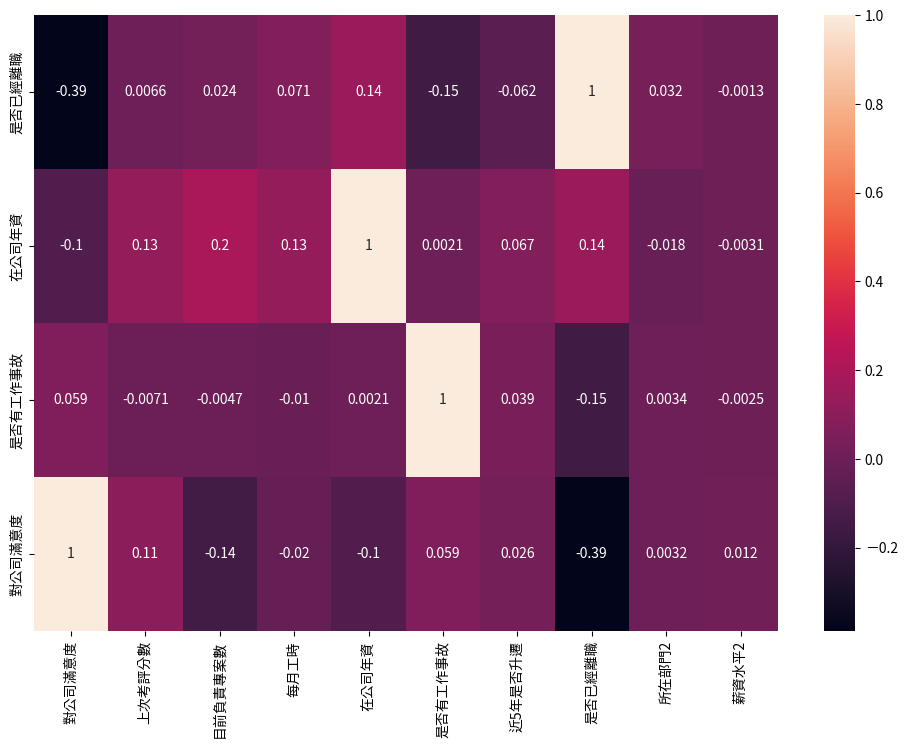

In [51]:
df3 = df2.corr()
df4 = df3.sort_values(by="是否已經離職",ascending=False)
a1 = (df4["是否已經離職"]>0.1) | (df4["是否已經離職"]<-0.1)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df4[a1], annot=True)
plt.show()

---
# (2).把上述的【重要欄位】畫出配對圖

<Figure size 1000x600 with 0 Axes>

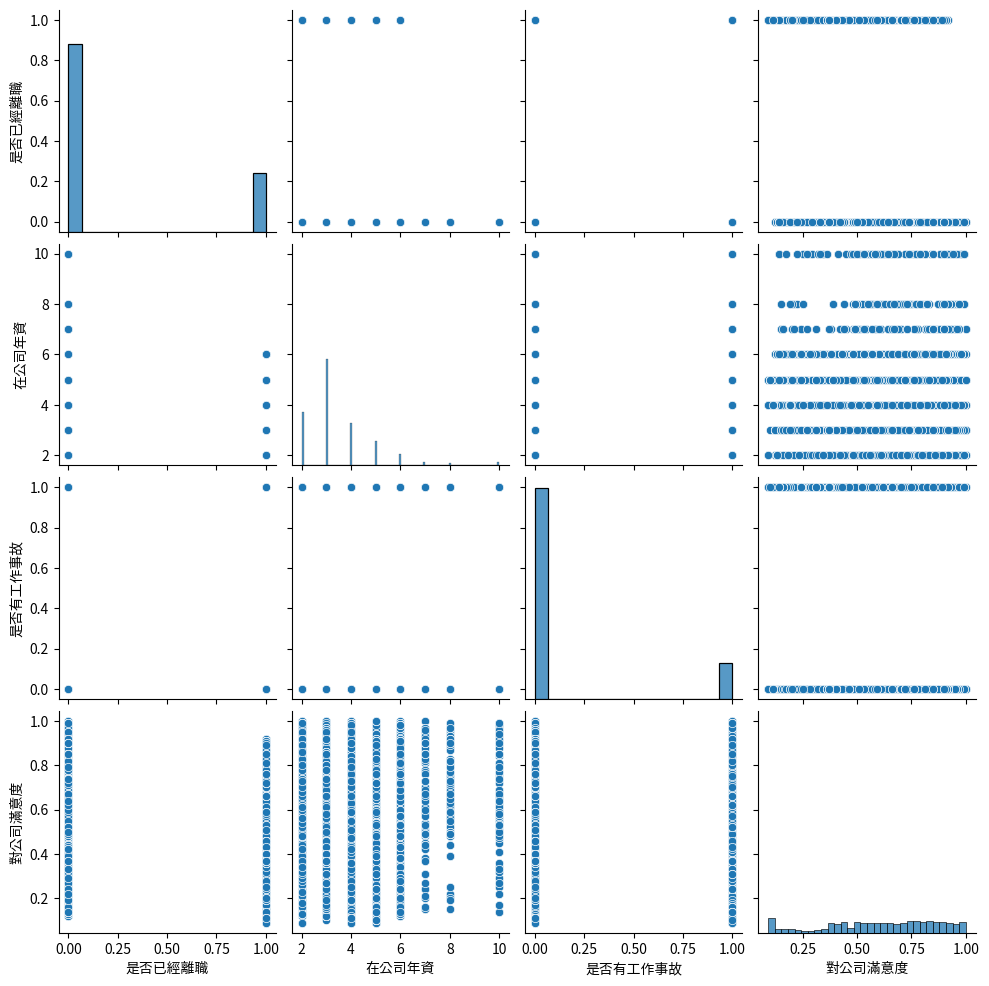

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.pairplot(df[["是否已經離職","在公司年資","是否有工作事故","對公司滿意度"]])
plt.show()

---
#(3).畫出2個欄位【對公司滿意度,在公司年資】的配對圖，用第3個欄位【是否已經離職】來配色

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


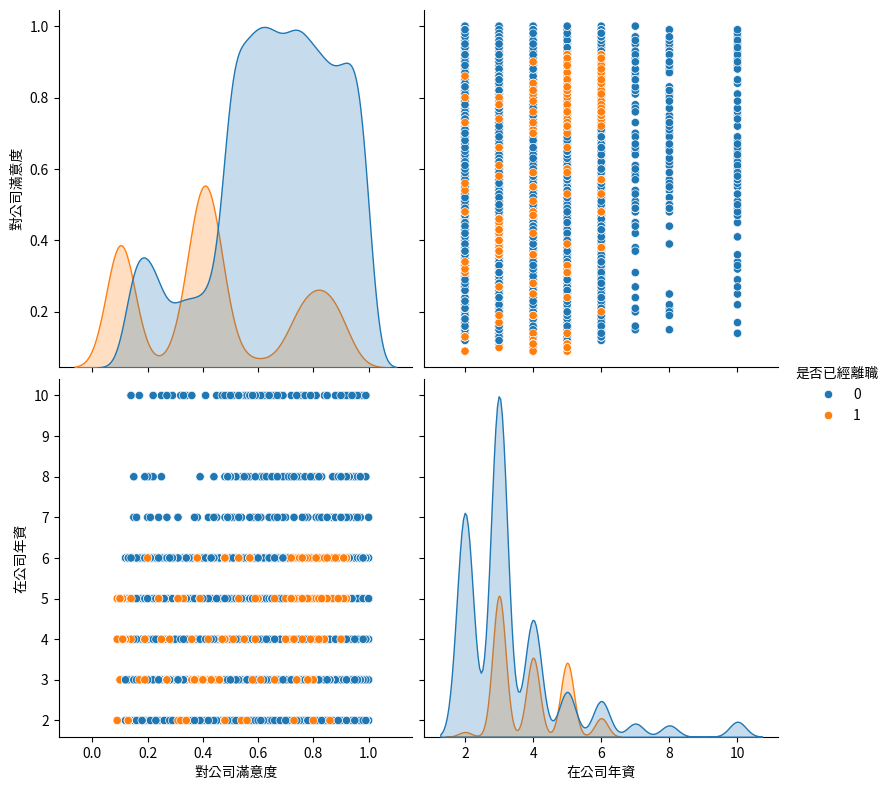

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,vars=["對公司滿意度","在公司年資"],hue="是否已經離職",size=4)
plt.show()

---
#(4).畫出1個欄位【對公司滿意度】的數據分佈圖，用欄位【是否已經離職】來配色

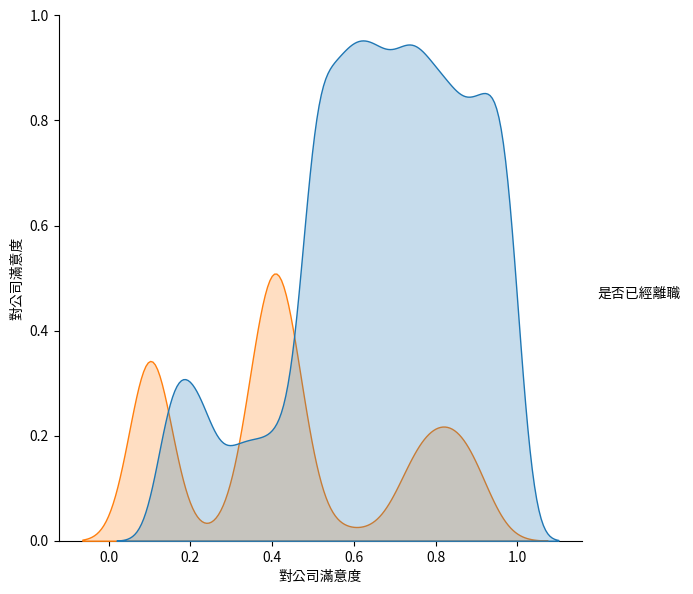

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,vars=["對公司滿意度"],hue="是否已經離職",height=6)
plt.show()

---
# (5).畫出【對公司滿意度 vs 是否已經離職】的點狀圖

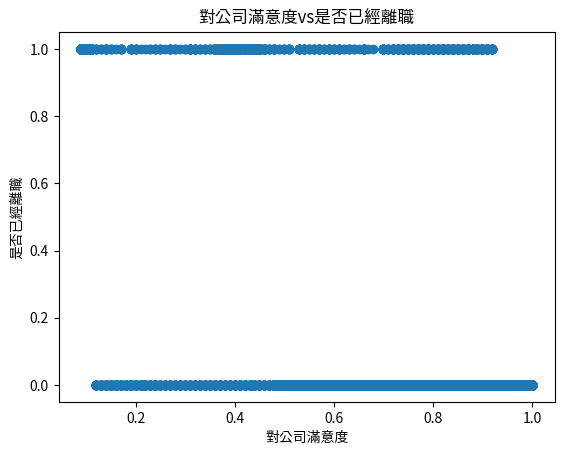

In [55]:
import matplotlib.pyplot as plt
plt.scatter(df2["對公司滿意度"],df2["是否已經離職"])
plt.title("對公司滿意度vs是否已經離職")
plt.xlabel("對公司滿意度")
plt.ylabel("是否已經離職")
plt.show()

---
#(6).用扇形圖畫出【是否已經離職】的佔比
0：沒有離職

1：已經離職


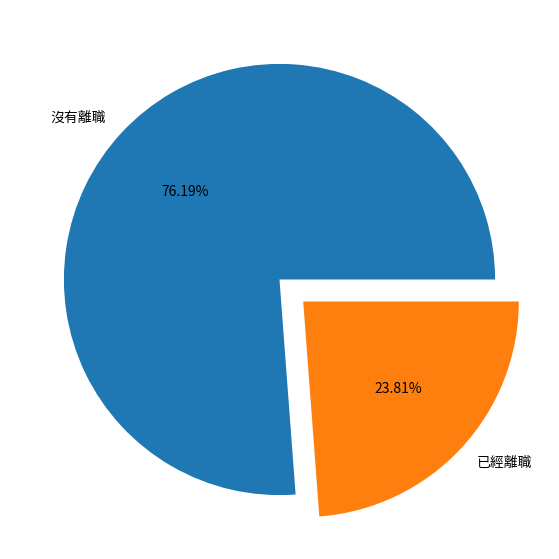

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
plt.pie(df2["是否已經離職"].value_counts(normalize=True),
      labels=["沒有離職","已經離職"],
      explode=[0, 0.15],
      autopct="%.2f%%")
plt.show()

---
#4.練習4：請用深度學習（多顆類神經網絡），讀入紅酒數據，使用OneHotEncoder來編碼是種類的全部欄位

資料集檔案：https://acupun.site/lecture/predict/example/resource/wine-chi-4.csv

---
#請完成以下任務：
#(1).使用OneHotEncoder來編碼，轉換文字種類的欄位
#(2).(2).用pandas方法畫出訓練過程的loss/accuracy的歷史曲線
#(3).計算本model的準確率accuracy（計算2個：訓練數據，測試數據）
#(4).回答這個model有沒有發生overfitting的現象？
#(5).讓模型model進行以下t1數據的預測(請回答酒種名稱，例如：Barolo酒，Grignolino酒，Barbera酒）
t1 =[[13.53, 3.10, 2.74, 24.5, 96.0, 2.05, 3.76, 0.56, 1.35, 9.20, 0.61, 1.60, 560.0]]

---
#(1).使用OneHotEncoder來編碼，轉換文字種類的欄位

In [57]:
import pandas as pd
df = pd.read_csv("https://acupun.site/lecture/predict/example/resource/wine-chi-4.csv")
df

,酒精濃度,蘋果酸,灰,灰的鹼度,鎂,總酚,黃酮類化合物,非黃烷類酚類,原花青素,色彩強度,色調,稀釋酒,脯氨酸,種類
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Barolo酒
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Barolo酒
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Barolo酒
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Barolo酒
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Barolo酒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Barbera酒
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Barbera酒
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Barbera酒
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Barbera酒


In [58]:
import sklearn.preprocessing as prep
arr2 = prep.OneHotEncoder(sparse_output=False).fit_transform(df[["種類"]])
pd.DataFrame(arr2,columns=["種類1","種類2","種類3"])

,種類1,種類2,種類3
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
173,1.0,0.0,0.0
174,1.0,0.0,0.0
175,1.0,0.0,0.0
176,1.0,0.0,0.0


---
#(2).用pandas方法畫出訓練過程的loss/accuracy的歷史曲線
注意：若要限制y軸顯示的範圍，請加入參數：ylim=[0,3]

In [ ]:
import sklearn.model_selection as ms
x_train,x_test,y_train,y_test = ms.train_test_split(df[["酒精濃度","蘋果酸","灰","灰的鹼度","鎂","總酚","黃酮類化合物","非黃烷類酚類","原花青素","色彩強度","色調","稀釋酒","脯氨酸"]],
                           arr2,
                           test_size=0.3)
x_train

,酒精濃度,蘋果酸,灰,灰的鹼度,鎂,總酚,黃酮類化合物,非黃烷類酚類,原花青素,色彩強度,色調,稀釋酒,脯氨酸
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=15, input_dim=13 ,activation="relu"),
    tf.keras.layers.Dense(units=10,activation="relu"),
    tf.keras.layers.Dense(units=3, activation="softmax")
    ])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history_train = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 7ms/step - loss: 57.5866 - categorical_accuracy: 0.2742
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 50.7148 - categorical_accuracy: 0.2742
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 44.3910 - categorical_accuracy: 0.2742
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 38.2163 - categorical_accuracy: 0.2742
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 32.1988 - categorical_accuracy: 0.2742
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 26.7547 - categorical_accuracy: 0.2742
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 22.6615 - categorical_accuracy: 0.1371
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 20.2143 - categorical_accuracy: 0.3387
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 17.4026 - categorical_accuracy: 0.2823
E

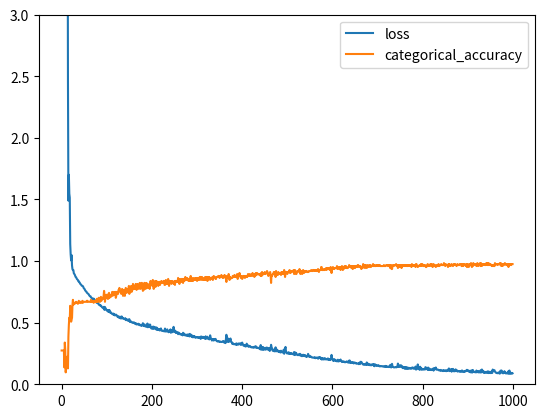

In [ ]:
import matplotlib.pyplot as plt
df_his_train = pd.DataFrame(history_train.history)
df_his_train.plot(kind="line",ylim=[0,3])
plt.show()

---
#(3).計算本model的準確率accuracy（計算2個：訓練數據，測試數據）

In [ ]:
loss_train,accuracy_train = model.evaluate(x_train,y_train)
print("訓練數據的準確率=",accuracy_train)

4/4 [==============================] - 0s 5ms/step - loss: 0.0852 - categorical_accuracy: 0.9758
訓練數據的準確率= 0.975806474685669


In [ ]:
loss_test,accuracy_test = model.evaluate(x_test,y_test)
print("測試數據的準確率=",accuracy_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.2144 - categorical_accuracy: 0.9074
測試數據的準確率= 0.9074074029922485


---
#(4).回答這個model有沒有發生overfitting的現象？

In [ ]:
'''
回答這個model有沒有發生overfitting的現象
答：沒有，因為兩個數據的準確率相差不大
'''

---
#(5).讓模型model進行以下t1數據的預測(請回答酒種名稱，例如：Barolo酒，Grignolino酒，Barbera酒）
**t1 =[[13.53,	3.10,	2.74,	24.5,	96.0,	2.05,	3.76,	0.56,	1.35,	9.20,	0.61,	1.60,	560.0]]**

In [ ]:
import numpy as np
t1 =[[13.53, 3.10, 2.74, 24.5, 96.0, 2.05, 3.76, 0.56, 1.35, 9.20, 0.61, 1.60, 560.0]]
a = model.predict(t1)
b = a[0]
max_index = np.array(b).argmax()

if max_index == 0:
  print("Barolo酒")
elif max_index == 1:
  print("Grignolino酒")
else:
  print("Barbera酒")

1/1 [==============================] - 0s 36ms/step
Barolo酒


In [ ]:
'''
預測的酒種是 = Barolo酒
'''